<div class="markdown-converter__text--rendered"><p>This dataset contains information about used cars listed on <a href="http://www.cardekho.com" target="_blank">www.cardekho.com</a> <br>
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.<br>
<strong>The columns in the given dataset are as follows</strong>:</p>
<ol>
<li>name</li>
<li>year</li>
<li>selling_price</li>
<li>km_driven</li>
<li>fuel</li>
<li>seller_type</li>
<li>transmission</li>
<li>Owner</li>
</ol>


Objective of this runbook is Implement a fairly simple model, but with end to end implementation

First we will Try very basic model and later on will gradually increase the complexity of model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car_data = pd.read_csv("/content/drive/My Drive/Study/Resume Content/CarDekhoEndtoEnd_Krish/car_data.csv")

In [ ]:
car_data.info()
#Here we have total of 9 columns and "Selling_Price" is our Target Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.head()
#Now We can see we have, Categorical Variables in data named as, "Year", "Fuel_Type", "Seller_Type", "Transmission" 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Let's Print out the Categories for our Categorical Values
print("Unique values of 'Fuel Type' Feature      : ", car_data['Fuel_Type'].unique())
print("Unique values of 'Seller_Type' Feature   : ", car_data['Seller_Type'].unique())
print("Unique values of 'Transmission' Feature  : ", car_data['Transmission'].unique())

Unique values of 'Fuel Type' Feature      :  ['Petrol' 'Diesel' 'CNG']
Unique values of 'Seller_Type' Feature   :  ['Dealer' 'Individual']
Unique values of 'Transmission' Feature  :  ['Manual' 'Automatic']


In [ ]:
car_data.isnull().sum()
#We don't have NaN values in our data, well that's good thing because we don't need think about techniques to fill null values or 
#dropping them

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.corr()
#Here we can see that Present Price is positively correlated to Selling Price, means Present_Price is good predictor of Selling_Price
#After That Year is also contributing to predict Selling_Price

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [ ]:
#Let's drop car_name because we don't need it
car_data.drop(['Car_Name'], axis = 1, inplace = True)

In [ ]:
#let do some feature engineering, as we're doing this project in 2020, so we can generate a new feature 
#how many years old a car is with the help of Year feature
from datetime import datetime
car_data['Years_old'] = datetime.now().year - car_data['Year']

In [ ]:
#now let's deal with categorical variable use one hot encoding to convert them
#and about the numerical feature, we would be using tree based model, which doesn't affect by scale of numerical features that much
#later we will do scaling of numerical features and will see the difference

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'first')

Fuel_Type_ohe = enc.fit_transform(car_data['Fuel_Type'].values.reshape(-1, 1)).toarray()
Seller_Type_ohe = enc.fit_transform(car_data['Seller_Type'].values.reshape(-1, 1)).toarray()
Transmission_ohe = enc.fit_transform(car_data['Transmission'].values.reshape(-1, 1)).toarray()

print("Fuel_Type Shape = ", Fuel_Type_ohe.shape)
print("Seller_Type_ohe Shape = ", Seller_Type_ohe.shape)
print("Transmission_ohe Shape = ", Transmission_ohe.shape)

Fuel_Type Shape =  (301, 2)
Seller_Type_ohe Shape =  (301, 1)
Transmission_ohe Shape =  (301, 1)


In [ ]:
#Lets concatenate our onehot encoded features and split our data into dependent and independent variables
X = np.concatenate((Fuel_Type_ohe, Seller_Type_ohe, Transmission_ohe, car_data['Present_Price'].values.reshape(-1, 1), 
                    car_data['Kms_Driven'].values.reshape(-1, 1), car_data['Owner'].values.reshape(-1, 1), 
                    car_data['Years_old'].values.reshape(-1, 1)), axis = 1)
y = car_data['Selling_Price'].values

print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (301, 8)
Shape of y :  (301,)


In [ ]:
#Splitting the data into Test and Train part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)


Shape of X_train :  (225, 8)
Shape of y_train :  (225,)
Shape of X_test :  (76, 8)
Shape of y_test :  (76,)


In [ ]:
#Finding the best Parameter for our model, here we are using RandomForest Regressor model and will be tuning only
#Two Parameters, max_depth and n_estimators but your are free to try other parameters as well
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(40, 140, 6)] 
max_depth = [1, 3, 5, 7, 9, 11]
param = {'n_estimators' : n_estimators, 'max_depth' : max_depth}

model = RandomForestRegressor()
model_rcv = RandomizedSearchCV(model, param, verbose = 1, n_jobs = -1)

model_rcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.3s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [ ]:
#Saving our Best parameters
max_depth = model_rcv.best_params_['max_depth']
n_estimators = model_rcv.best_params_['n_estimators']
print(max_depth, n_estimators)
model_rcv.best_params_

9 100


{'max_depth': 9, 'n_estimators': 100}

In [ ]:
#now when we have our best parameters, let's train our model again
max_depth = model_rcv.best_params_['max_depth']
n_estimators = model_rcv.best_params_['n_estimators']

model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=11, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Predicting the Values
predictions = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


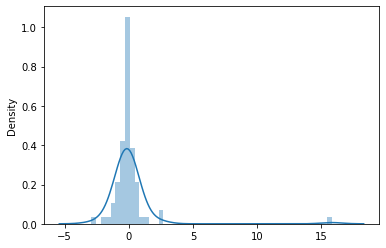

In [ ]:
#From below graph we can see that our model is pretty much working fine, because difference is normally distributed
sns.distplot(y_test - predictions)

In [ ]:
#Now Checking Errors
from sklearn.metrics import  mean_absolute_error, mean_squared_error
print("Mean Absolute Error          : ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error           : ", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error      : ", np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error          :  0.6788050744411209
Mean Squared Error           :  3.5094064562757237
Root Mean Squared Error      :  1.8733409877210618


In [ ]:
#Now dumping our model into Pickle File, and later on we will be using this model for the prediction
import pickle
file = open('model_rf_regressor.pkl', 'wb')
pickle.dump(model, file)    

Conclusion: This model was very simple, and the sole purpose of this exercise was to understand and grasp the whole lifecycle of Machine Learning Projects, see app.py file for next steps.